# Random Forests

### ANALYZING Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
%matplotlib inline
import mglearn
import numpy as np

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [10]:
forest=RandomForestClassifier(n_estimators=5,random_state=42).fit(X_train,y_train)

Tree that are built as a part of random forest are stored in the estimator attribute and max_feature here bydefault = 'auto'.

### Visualizing the decision boundaries learned by each tree. And prediction made by the random forest using these tree

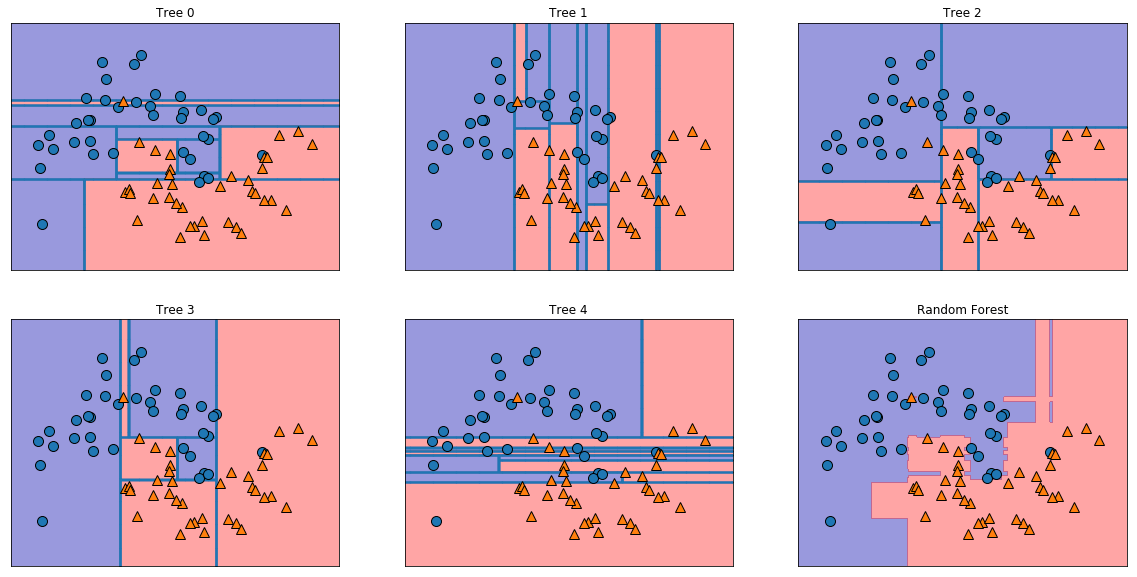

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Explanation: the decision boundaries learned by the five trees are quite different.
Random forest overfit less than any of these trees individually and provide a much more intutive decision boundaries.
In real application we would use many more trees leading to even a smoother decision boundary.

## Applying Random Forest on larger date set

###  On Breast Cancer Dataset

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer=load_breast_cancer()

In [18]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [22]:
forest=RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)

In [23]:
# Accuracy on train set
forest.score(X_train,y_train)


1.0

In [26]:
# Accuracy on test set
forest.score(X_test,y_test) # gives accuarcy better than linear models and single decision tree without any tuning of parameters

0.97202797202797198

## Feature Importance prediction by Random Forests

Feature importance provided by random forests are more reliable than the ones provided by single tree.

The feature importance provided by Random forests are computed by aggregating the feature importances over the trees in the forest.

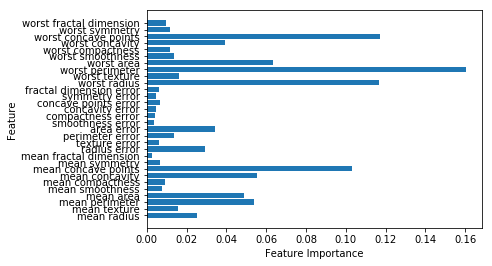

In [32]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

As you can see, the random forest gives non-zero importance to amny more features as compared to single decision tree.
It also give importance to 'worst radius' but chooses 'worst perimeter' to be more informative overall.

The randomness forces the algorithm to consider many possible explanation for features.

The result is that Random Forest captures much broader picture than a single tree.